In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, classification_report
)
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv("got_survival_dataset.csv")
df.head()

,house,total_allies,avg_loyalty,avg_power,avg_betrayal,diplomacy,stability,honor,wealth,survive
0,Stark,1,6.13,4.39,0.64,3.10,6.60,3.73,3.58,No
1,Baratheon,1,5.63,5.25,2.85,6.30,4.45,5.22,7.94,No
2,Stark,4,6.25,8.26,2.21,3.25,4.88,6.96,8.24,Yes
3,Baratheon,3,6.33,4.20,1.83,7.54,7.52,6.36,8.19,Yes
4,Targaryen,1,7.10,5.68,4.66,6.60,8.55,5.18,2.41,Yes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house         300 non-null    object 
 1   total_allies  300 non-null    int64  
 2   avg_loyalty   300 non-null    float64
 3   avg_power     300 non-null    float64
 4   avg_betrayal  300 non-null    float64
 5   diplomacy     300 non-null    float64
 6   stability     300 non-null    float64
 7   honor         300 non-null    float64
 8   wealth        300 non-null    float64
 9   survive       300 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 23.6+ KB


In [52]:
df['survive'].value_counts()

survive
No     150
Yes    150
Name: count, dtype: int64

In [53]:
X = df.drop(columns=["survive"])
y = df["survive"].map({"No": 0, "Yes": 1})

In [83]:
X.head(10)

,house,total_allies,avg_loyalty,avg_power,avg_betrayal,diplomacy,stability,honor,wealth
0,Stark,1,6.13,4.39,0.64,3.10,6.60,3.73,3.58
1,Baratheon,1,5.63,5.25,2.85,6.30,4.45,5.22,7.94
2,Stark,4,6.25,8.26,2.21,3.25,4.88,6.96,8.24
3,Baratheon,3,6.33,4.20,1.83,7.54,7.52,6.36,8.19
4,Targaryen,1,7.10,5.68,4.66,6.60,8.55,5.18,2.41
5,Stark,3,6.43,5.09,3.18,3.32,6.24,4.33,9.00
6,Lannister,5,8.86,8.99,3.88,8.13,6.73,7.78,3.20
7,Stark,4,6.48,4.42,3.77,7.85,6.03,4.31,4.87
8,Baratheon,4,4.79,4.55,2.68,6.35,4.34,8.73,8.93
9,Baratheon,2,7.12,8.79,3.59,7.05,6.96,4.64,6.53


In [55]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: survive, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 9), (60, 9), (240,), (60,))

In [58]:
#preprocessing
categorical_cols = ["house"]
numeric_cols = [c for c in X.columns if c not in categorical_cols]
categorical_cols,numeric_cols

(['house'],
 ['total_allies',
  'avg_loyalty',
  'avg_power',
  'avg_betrayal',
  'diplomacy',
  'stability',
  'honor',
  'wealth'])

In [59]:
#preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols)
])

In [60]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="liblinear", random_state=42))
])

In [61]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(pipeline, X, y, cv=cv, scoring="accuracy")
cv_auc = cross_val_score(pipeline, X, y, cv=cv, scoring="roc_auc")

print("Cross-validation Accuracy:", cv_accuracy.mean())
print("Cross-validation ROC AUC:", cv_auc.mean())


Cross-validation Accuracy: 0.9666666666666666
Cross-validation ROC AUC: 0.9982222222222223


In [62]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_allies',
                                                   'avg_loyalty', 'avg_power',
                                                   'avg_betrayal', 'diplomacy',
                                                   'stability', 'honor',
                                                   'wealth']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['house'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [63]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9666666666666667
F1 Score: 0.9830508474576272
ROC AUC: 0.9955555555555555


In [65]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[30  0]
 [ 1 29]]


In [66]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



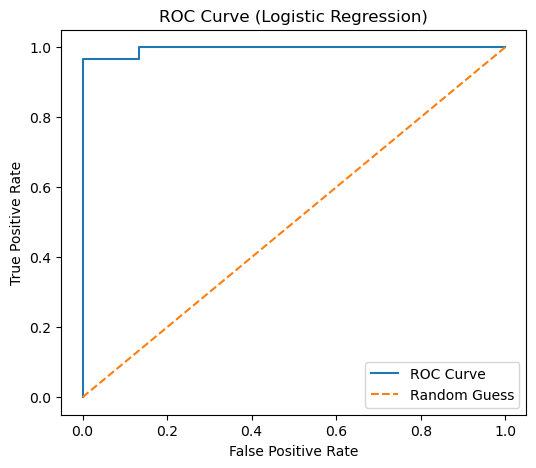

In [67]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],"--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend()
plt.show()


In [68]:
preprocessor.fit(X_train)

num_features = numeric_cols
cat_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
all_features = num_features + cat_features

coefficients = pipeline.named_steps["classifier"].coef_[0]
coef_df = pd.DataFrame({"Feature": all_features, "Coefficient": coefficients})
coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False)

print("\nTop Influential Features:\n", coef_df)



Top Influential Features:
             Feature  Coefficient
4         diplomacy     2.445847
3      avg_betrayal    -2.193902
2         avg_power     2.114296
1       avg_loyalty     1.901905
5         stability     1.872559
6             honor     0.827424
7            wealth     0.827319
9       house_Stark     0.125893
8   house_Lannister    -0.108383
10  house_Targaryen     0.097438
0      total_allies     0.095624


In [69]:
import joblib

In [70]:
joblib.dump(pipeline, "got_survival_lr_model.joblib")

print(" Model exported successfully as 'got_survival_lr_model.joblib'")


 Model exported successfully as 'got_survival_lr_model.joblib'


In [93]:
pipeline = joblib.load("got_survival_lr_model.joblib")
print("Model imported successfully!")


data = pd.DataFrame({
    'house': ['Targaryen'],
    'total_allies': [4],
    'avg_loyalty': [6.5],
    'avg_power': [8],
    'avg_betrayal': [5],
    'diplomacy': [7],
    'stability': [5],
    'honor': [6],
    'wealth': [5]
})

prediction = pipeline.predict(data)
prediction_proba = pipeline.predict_proba(data)

print("Predicted survival:", prediction[0])
print("Prediction probabilities:", prediction_proba[0])

if prediction[0]==1:
    print("Congratulations  Man.....you survived the Game of Thrones")
else:
    print("totally your mistake...cause when you when play this Game of Thrones you Never WIN ....you either SURVIVE or you DIE")

Model imported successfully!
Predicted survival: 1
Prediction probabilities: [0.29495557 0.70504443]
Congratulations  Man.....you survived the Game of Thrones
